In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from predictor import Predictor
from reshaper import Reshaper
from reshaper import save_obj
from loader import Loader
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
semantic = {
    "Weight": 0, # peso
    "Height": 1, # altura
    "WAIST_HT": 2,  # 'altura_cintura'
    "CROTCH_HT": 3,  # 'altura_virilha'
    "UP_ARM_GTH_L": 4,  # 'braço'
    "WAIST_GTH": 5,  # 'cintura'
    "ARM_LTH_L": 6,  # 'comp_braço'
    "THIGH_GTH_L_HZ": 7,  # 'coxa'
    "CR_SHOULDER": 8,  # 'ombro_a_ombro'
    "CALF_GTH_L": 9,  # 'panturrilha'
    "BUST_CHEST_GTH": 10,  # 'peito'
    "MID_NECK_GTH": 11,  # 'pescoço'
    "DIST_NECK_T_HIP": 12,  # 'pescoço_ao_quadril'
    "WRIST_GTH": 13,  # 'pulso'
    "HIP_GTH": 14,  # 'quadril'
    "Age": 15
}

# Select life colums

In [3]:
life_data = pd.read_csv("base_data/life_body_measure.csv", delimiter=",", decimal=",")
life_data.dropna(inplace=True)

In [4]:
life_data = life_data[semantic.keys()]

In [5]:
np.save("processed_data/life_selected.npy", np.array(life_data))

# Predict age

In [6]:
life_data_without_age = life_data.drop("Age", axis=1).to_numpy()
with np.load("./processed_data/measure.npz", allow_pickle=True) as data:
    measure, _, _, _ = data.values()
    measure /= 10
    measure[0] = ((measure[0]/100)**3)

In [7]:
distance = cdist(measure.T, life_data_without_age)
minid = np.argmin(distance, axis=1)
ages = life_data.loc[minid]["Age"].to_numpy()
measure_with_age = np.column_stack((measure.T, ages))

In [8]:
np.save("processed_data/measures_with_age.npy", measure_with_age)

# Correlation analysis

In [9]:
dataset = pd.read_csv("base_data/life_body_measure.csv", sep=",", decimal=",")
dataset = dataset.drop(["WTH_THIGH_SUM"], axis=1)

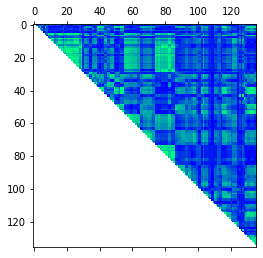

In [10]:
correlation_matrix = dataset.corr(method='pearson')
correlation_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
correlation_matrix.to_pickle("correlation.pkl")
plt.matshow(correlation_matrix.abs(), cmap="winter")

In [11]:
correlation_matrix.loc["Age"].abs().sort_values(ascending=False).head(50)

WAIST_T_BUTTOCK        0.510945
WAIST_BUTTOCK_HT_R     0.494032
WHtR                   0.488762
WAIST_BUTTOCK_HT_L     0.486497
WAIST_T_HIGH_HIP_B     0.477425
ABSI                   0.474412
WHR                    0.463794
HEAD_HT                0.460217
BELLY_DEPTH            0.377096
WAIST_GTH              0.377019
MAX_BELLY_DEPTH        0.366579
HIGH_WAIST_GTH         0.359188
WAISTBAND_DEPTH        0.347219
TORSO_WTH_WAIST        0.343601
DIST_NECK_T_HIP        0.322981
WAISTBAND_F_HT         0.322658
MIDDLE_HIP             0.319201
MAX_BELLY_CIRC         0.314072
BREAST_DEPTH           0.312053
DIST_WAIST_KNEE        0.311473
BELLY_CIRC             0.304669
HIGH_HIP_GTH           0.300324
NECK_DEPTH             0.297525
WAISTBAND              0.296736
SIDE_UP_TORSO_LTH_R    0.293075
HIP_DEPTH              0.289639
HT_SHOULDER_BLADES     0.281420
MID_NECK_GTH           0.281243
WRIST_GTH              0.273568
BREAST_HT              0.272293
IN_LEG_ANKLE_L         0.270701
SIDESEAM

In [12]:
minor_correlation = pd.concat([correlation_matrix.abs().idxmax(), correlation_matrix.abs().max()], axis=1)
minor_correlation = minor_correlation.reset_index(level=0)
minor_correlation.columns = ["from", "to", "corr"]
minor_correlation.sort_values(by="corr",ascending=False)

,from,to,corr
35,CROTCH_LTH_AT_WB_A,CROTCH_LTH_AT_WB,1.000000
20,KNEE_HT,BUTTOCK_HT,0.999943
25,SCAPULA_HT_2,Height,0.999929
81,SIDESEAM_3D_WD_R,SIDESEAM_R,0.999816
22,BELLY_CIRC_HT,BUTTOCK_HT,0.999079
...,...,...,...
1,Age,Record Number,0.454797
108,SHOULDER_ANGLE_L,SIDE_UP_TORSO_LTH_L,0.348551
126,DIST_WAISTBAND_HIP,DEV_WB_FROM_WAIST_S,0.233677
2,BMI,Age,0.231501


In [13]:
correlation_matrix.loc["Age"].abs().sort_values(ascending=False).head(50)

WAIST_T_BUTTOCK        0.510945
WAIST_BUTTOCK_HT_R     0.494032
WHtR                   0.488762
WAIST_BUTTOCK_HT_L     0.486497
WAIST_T_HIGH_HIP_B     0.477425
ABSI                   0.474412
WHR                    0.463794
HEAD_HT                0.460217
BELLY_DEPTH            0.377096
WAIST_GTH              0.377019
MAX_BELLY_DEPTH        0.366579
HIGH_WAIST_GTH         0.359188
WAISTBAND_DEPTH        0.347219
TORSO_WTH_WAIST        0.343601
DIST_NECK_T_HIP        0.322981
WAISTBAND_F_HT         0.322658
MIDDLE_HIP             0.319201
MAX_BELLY_CIRC         0.314072
BREAST_DEPTH           0.312053
DIST_WAIST_KNEE        0.311473
BELLY_CIRC             0.304669
HIGH_HIP_GTH           0.300324
NECK_DEPTH             0.297525
WAISTBAND              0.296736
SIDE_UP_TORSO_LTH_R    0.293075
HIP_DEPTH              0.289639
HT_SHOULDER_BLADES     0.281420
MID_NECK_GTH           0.281243
WRIST_GTH              0.273568
BREAST_HT              0.272293
IN_LEG_ANKLE_L         0.270701
SIDESEAM

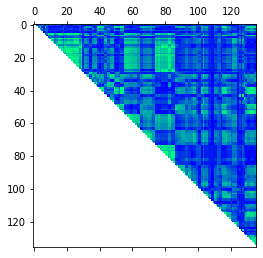

In [14]:
plt.matshow(correlation_matrix.abs(), cmap="winter")

In [15]:
correlation_matrix.to_pickle("correlation.pkl")

# Raw data analysis

In [66]:
pred = Predictor(age=19, weight=70.8, height=168.2)

In [67]:
over_time = []
for i in np.arange(19,81):
    over_time.append(np.append(pred.predict_next(denormalize=True), i))

In [68]:
# data = np.load("./processed_data/life_selected.npy")
data = pd.read_csv("base_data/life_body_measure.csv", delimiter=",", decimal=",")
data = data[semantic.keys()]
data = pd.DataFrame(data.to_numpy())

In [69]:
over_time_better = []
over_time_errors = []

for element in over_time:
    temp_data = data.copy()
    age = element[-1]
    temp_data = temp_data[temp_data[15] == age]
    
    if temp_data.empty:
        over_time_errors.append(np.nan)
        over_time_better.append(np.full(16,np.nan))
    else:
        error = np.sqrt(((temp_data - element)**2).sum(axis=1))
        error.reset_index(drop=True, inplace=True)
        better = np.argmin(error)
        over_time_errors.append(error.iloc[better])
        over_time_better.append(temp_data.iloc[better])

In [70]:
over_time_plot = np.array(over_time)
over_time_better_plot = np.array(over_time_better)
over_time_errors_plot = np.array(over_time_errors)
age_to_plot = over_time_plot[:,-1]

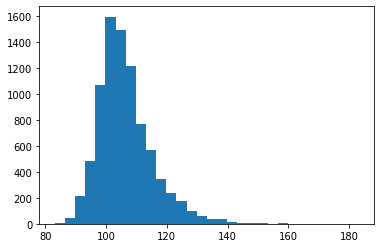

In [71]:
plt.hist(data[14], bins=30)
plt.show()

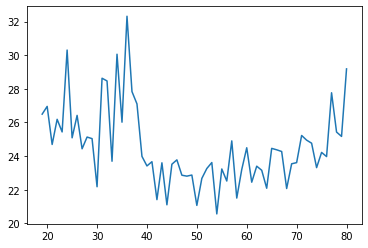

In [72]:
plt.plot(age_to_plot, over_time_errors_plot)

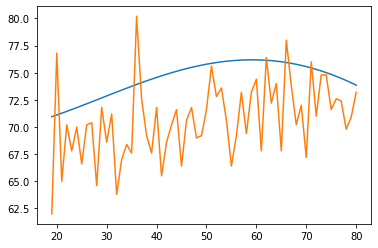

In [74]:
plt.plot(age_to_plot, over_time_plot[:,0])
plt.plot(age_to_plot, over_time_better_plot[:,0])

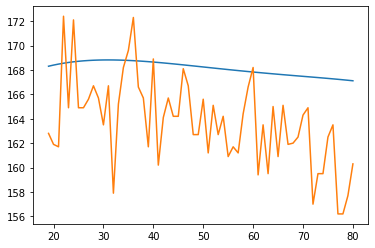

In [75]:
plt.plot(age_to_plot, over_time_plot[:,1])
plt.plot(age_to_plot, over_time_better_plot[:,1])

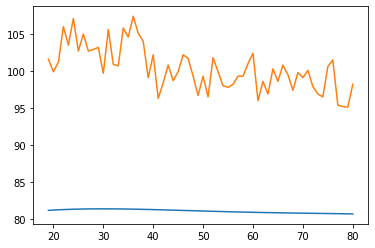

In [76]:
plt.plot(age_to_plot, over_time_plot[:,2])
plt.plot(age_to_plot, over_time_better_plot[:,2])

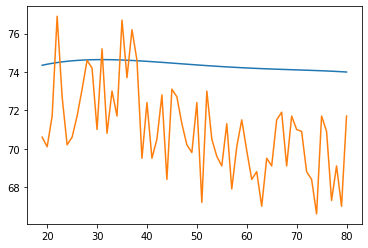

In [77]:
plt.plot(age_to_plot, over_time_plot[:,3])
plt.plot(age_to_plot, over_time_better_plot[:,3])

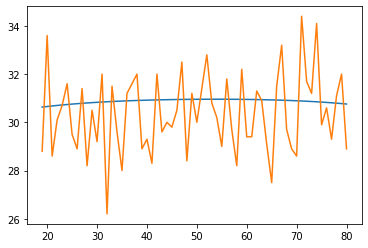

In [78]:
plt.plot(age_to_plot, over_time_plot[:,4])
plt.plot(age_to_plot, over_time_better_plot[:,4])

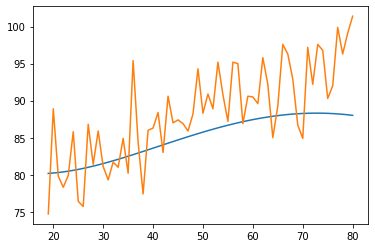

In [79]:
plt.plot(age_to_plot, over_time_plot[:,5])
plt.plot(age_to_plot, over_time_better_plot[:,5])

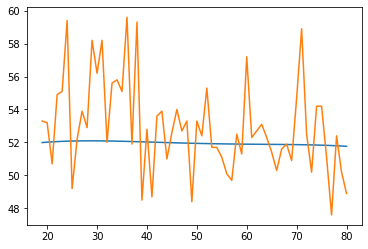

In [80]:
plt.plot(age_to_plot, over_time_plot[:,6])
plt.plot(age_to_plot, over_time_better_plot[:,6])

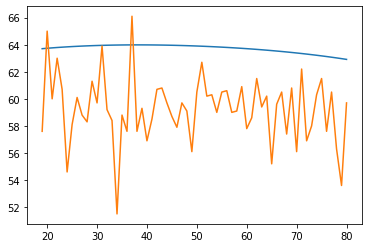

In [81]:
plt.plot(age_to_plot, over_time_plot[:,7])
plt.plot(age_to_plot, over_time_better_plot[:,7])

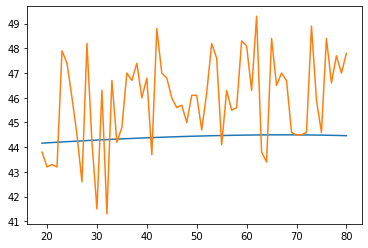

In [82]:
plt.plot(age_to_plot, over_time_plot[:,8])
plt.plot(age_to_plot, over_time_better_plot[:,8])

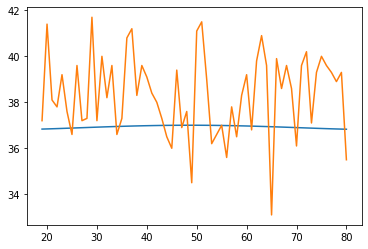

In [83]:
plt.plot(age_to_plot, over_time_plot[:,9])
plt.plot(age_to_plot, over_time_better_plot[:,9])

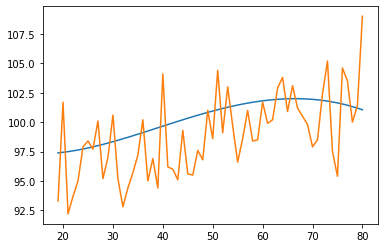

In [85]:
plt.plot(age_to_plot, over_time_plot[:,10])
plt.plot(age_to_plot, over_time_better_plot[:,10])

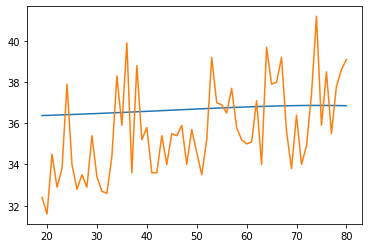

In [86]:
plt.plot(age_to_plot, over_time_plot[:,11])
plt.plot(age_to_plot, over_time_better_plot[:,11])

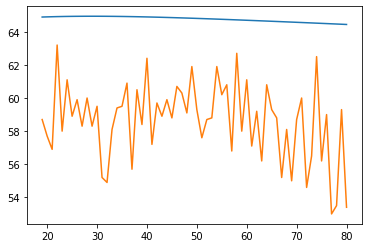

In [87]:
plt.plot(age_to_plot, over_time_plot[:,12])
plt.plot(age_to_plot, over_time_better_plot[:,12])

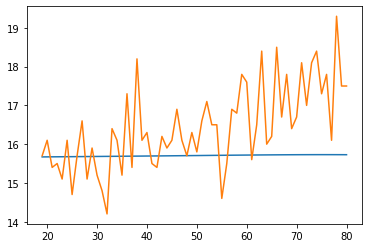

In [88]:
plt.plot(age_to_plot, over_time_plot[:,13])
plt.plot(age_to_plot, over_time_better_plot[:,13])

# 3D body analysis

In [95]:
from pygel3d import jupyter_display as jd
from pygel3d import hmesh

In [96]:
pred = Predictor(age=40, weight=70.450161, height=172.375510)
resh = Reshaper()
print(pred.current_measures)

[[ 1.14977643e-01  1.37591958e+00  1.92138924e-15 -1.10920780e-15
  -4.73385755e-16 -1.14169506e-15  3.00739185e-15  4.64103681e-17
   2.39477499e-15  5.10514049e-16  1.02102810e-16 -2.02349205e-15
  -1.85641472e-16  2.04205620e-16 -6.31181006e-16]]


In [97]:
v, n, f = resh.build_body(pred.current_measures)
save_obj("test1.obj",v,f,n)

obj file test1.obj saved


In [98]:
data = np.load("./processed_data/measures_with_age.npy")
data = pd.DataFrame(data)

In [99]:
pred = Predictor(age=40, weight=70.450161, height=172.375510)
measures= pred.normalized_measure[:,1026]
measures /= 10
measures[0] = ((measures[0]/100)**3)
print(measures)


[ 1.14601765e-10 -9.85818916e-02 -1.34389428e-01 -1.93550028e-01
  6.57936937e-02  1.39535629e-01 -1.44685439e-01 -3.72571914e-02
  4.18916114e-02 -4.07969397e-02  1.50681481e-01  1.54155635e-01
 -2.01858053e-02  7.74441263e-02 -1.56298553e-02]


In [100]:
v, n, f = resh.build_body(measures)
save_obj("test2.obj",v,f,n)

obj file test2.obj saved


In [101]:
data = np.load("./processed_data/life_selected.npy")
data = pd.DataFrame(data)

In [102]:
measures = data.iloc[1904].copy().to_numpy()[:-1]
measures -= pred.mean_measure.flatten()
measures /= pred.std_measure.flatten()

measures /= 10
measures[0] = ((measures[0]/100)**3)
print(measures)

[-1.94741412e-06 -2.08330447e+00 -1.54113563e+00 -1.44156611e+00
 -5.17128072e-01 -5.38562621e-01 -1.63445918e+00 -7.36104485e-01
 -1.26768294e+00 -8.60148431e-01 -6.70097701e-01 -1.02947054e+00
 -1.58384353e+00 -1.14221471e+00 -8.60263137e-01]


In [103]:
v, n, f = resh.build_body(measures)
save_obj("test3.obj",v,f,n)

obj file test3.obj saved


In [104]:
pred = Predictor(age=40, weight=70, height=145)
resh = Reshaper()
print(pred.current_measures)

[[ 8.77068401e-02 -2.51427936e+00  1.92138924e-15 -1.10920780e-15
  -4.73385755e-16 -1.14169506e-15  3.00739185e-15  4.64103681e-17
   2.39477499e-15  5.10514049e-16  1.02102810e-16 -2.02349205e-15
  -1.85641472e-16  2.04205620e-16 -6.31181006e-16]]


In [105]:
v, n, f = resh.build_body(pred.current_measures)
save_obj("test4.obj",v,f,n)

obj file test4.obj saved


In [106]:
pred = Predictor(age=40, weight=70, height=210)
resh = Reshaper()
print(pred.current_measures)

[[ 8.77068401e-02  6.72255060e+00  1.92138924e-15 -1.10920780e-15
  -4.73385755e-16 -1.14169506e-15  3.00739185e-15  4.64103681e-17
   2.39477499e-15  5.10514049e-16  1.02102810e-16 -2.02349205e-15
  -1.85641472e-16  2.04205620e-16 -6.31181006e-16]]


In [107]:
v, n, f = resh.build_body(pred.current_measures)
save_obj("test5.obj",v,f,n)

obj file test5.obj saved
